### Importing the libraries

In [1]:
import keras

Using TensorFlow backend.
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\TA

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, linewidth=120)
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [4]:
from keras.datasets import fashion_mnist
# data = fashion_mnist.load_data()

In [5]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [6]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [7]:
xtest.shape, ytest.shape

((10000, 28, 28), (10000,))

### Data Preprocessing

In [8]:
# Number of pixels in the images
image_rows = xtrain[0].shape[0]
image_cols = xtrain[0].shape[1]

In [9]:
xtrain = xtrain.reshape(xtrain.shape[0], image_rows, image_cols, 1)/255
xtest  =  xtest.reshape( xtest.shape[0], image_rows, image_cols, 1)/255

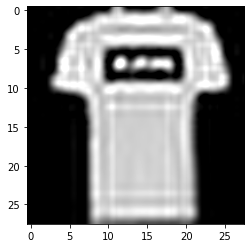

In [10]:
plt.imshow(xtrain[1].reshape(28, 28), cmap='gray', interpolation='sinc')

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_maker = LabelBinarizer()

ytrain = label_maker.fit_transform(ytrain)
ytest  = label_maker.transform(ytest)

In [12]:
ytrain.shape

(60000, 10)

### Defining a CNN model architecture

Defining a Sequential Model

In [13]:
fm_classifier = Sequential()

First layer of Convolution and Pooling

In [14]:
fm_classifier.add(Convolution2D(filters=32, kernel_size=5, input_shape=(28,28,1), activation='relu'))
fm_classifier.add(MaxPool2D(pool_size=(2,2)))
fm_classifier.add(Dropout(0.2))

Second layer of Convolution and Pooling

In [15]:
fm_classifier.add(Convolution2D(filters=16, kernel_size=3, activation='relu'))
fm_classifier.add(MaxPool2D(pool_size=(2,2)))

Third layer of Convolution and Pooling

In [16]:
# fm_classifier.add(Convolution2D(filters=16, kernel_size=3, activation='relu'))
# fm_classifier.add(MaxPool2D(pool_size=(2,2)))

Flattening

In [17]:
fm_classifier.add(Flatten())

Full Connection (ANN)

In [18]:
fm_classifier.add(Dense(128, activation='relu'))
fm_classifier.add(Dropout(0.2))
fm_classifier.add(Dense(32, activation='relu'))

Output Layer

In [19]:
fm_classifier.add(Dense(10, activation='softmax'))

Model Compilation

In [20]:
fm_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Lets see the model Summary

In [21]:
fm_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

Function to display model training progress

In [22]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Fitting the model

In [23]:
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [24]:
model_info = fm_classifier.fit(xtrain, ytrain,
                               batch_size=100, epochs=30,
                               verbose=1,
                               callbacks=[stop_early],
                               validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 52s 1ms/step - loss: 0.7150 - accuracy: 0.7331 - val_loss: 0.4521 - val_accuracy: 0.8382
Epoch 2/30
48000/48000 [==============================] - 52s 1ms/step - loss: 0.4469 - accuracy: 0.8374 - val_loss: 0.3901 - val_accuracy: 0.8591
Epoch 3/30
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3903 - accuracy: 0.8579 - val_loss: 0.3494 - val_accuracy: 0.8717
Epoch 4/30
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3580 - accuracy: 0.8699 - val_loss: 0.3201 - val_accuracy: 0.8825
Epoch 5/30
48000/48000 [==============================] - 54s 1ms/step - loss: 0.3339 - accuracy: 0.8781 - val_loss: 0.2992 - val_accuracy: 0.8896
Epoch 6/30
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3147 - accuracy: 0.8848 - val_loss: 0.2928 - val_accuracy: 0.8932
Epoch 7/30
48000/48000 [==============================] - 55s 1ms/s

KeyboardInterrupt: 

In [ ]:
plot_model_history(model_info)

#### Output Labels

In [26]:
cloth_name = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle_boot"
}

In [27]:
predictions = fm_classifier.predict(xtest)

In [28]:
predictions.shape

(10000, 10)

In [29]:
predicted_clothes = label_maker.inverse_transform(predictions)

In [30]:
predicted_clothes[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [31]:
ytest = label_maker.inverse_transform(ytest)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, predicted_clothes)
accuracy = accuracy_score(ytest, predicted_clothes)

In [33]:
cloth_labels = pd.Series(label_maker.classes_).map(cloth_name).values

Accuracy score is 90.12%




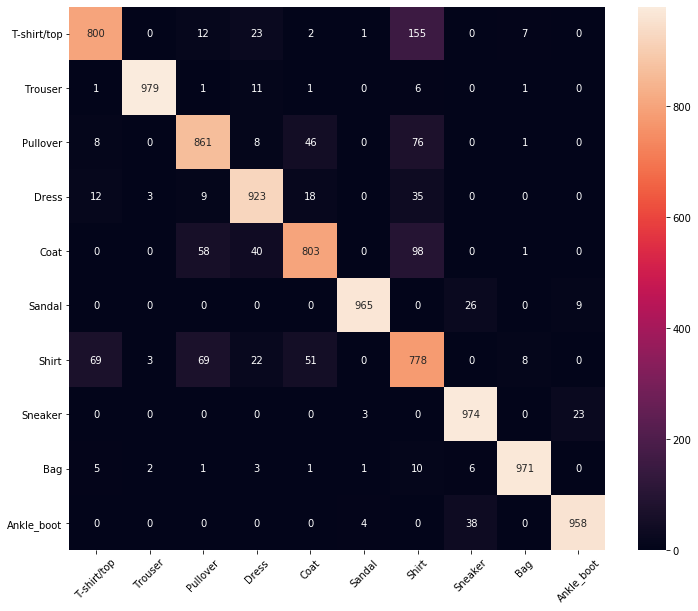

In [34]:
print("Accuracy score is {}%\n\n".format(round(accuracy*100,2)))

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, xticklabels=cloth_labels, yticklabels=cloth_labels, fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [35]:
results = pd.DataFrame(columns=['Real Cloth Name', 'Real Cloth Index', 'Predicted Cloth Index', 'Predicted Cloth Name'])
results['Real Cloth Index'] = ytest
results['Predicted Cloth Index'] = predicted_clothes
results['Real Cloth Name'] = results['Real Cloth Index'].map(cloth_name)
results['Predicted Cloth Name'] = results['Predicted Cloth Index'].map(cloth_name)
results.head(10)

,Real Cloth Name,Real Cloth Index,Predicted Cloth Index,Predicted Cloth Name
0,Ankle_boot,9,9,Ankle_boot
1,Pullover,2,2,Pullover
2,Trouser,1,1,Trouser
3,Trouser,1,1,Trouser
4,Shirt,6,6,Shirt
5,Trouser,1,1,Trouser
6,Coat,4,4,Coat
7,Shirt,6,6,Shirt
8,Sandal,5,5,Sandal
9,Sneaker,7,7,Sneaker


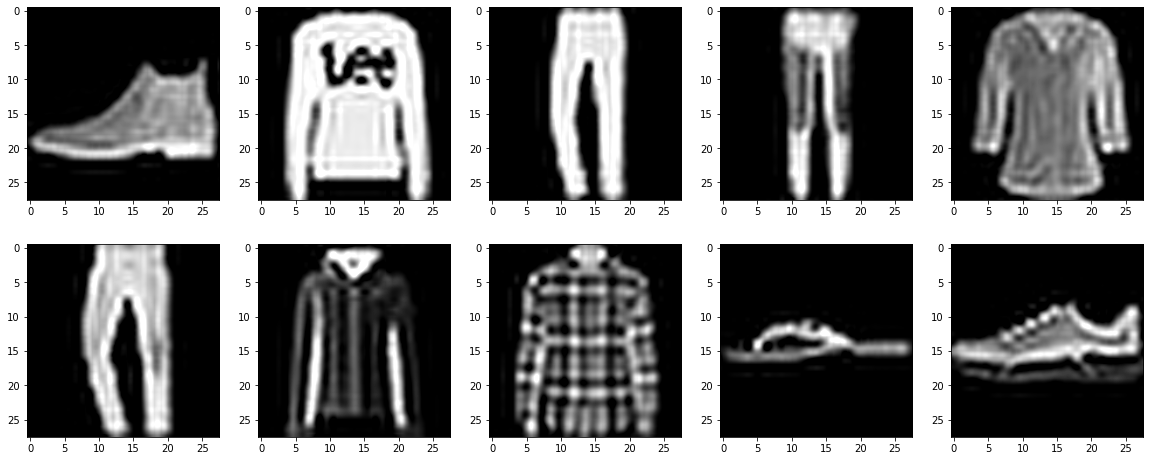

In [37]:
fig = plt.figure(figsize=(20,8))
for i in range(1, 11):
    ax = plt.subplot(2, 5, i)
    plt.imshow(xtest[i-1].reshape(28,28), interpolation='sinc', cmap='gray')
plt.show()